In [60]:
using PyPlot
using LinearAlgebra

In [31]:
function plotVectors(vecs, cols; alpha=1)
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color="#A9A9A9", zorder=0)
    plt.axhline(y=0, color="#A9A9A9", zorder=0)
    plt.grid(alpha=0.1)

    for i in 1:length(vecs)
        plt.quiver([0],
                   [0],
                   [vecs[i][1]],
                   [vecs[i][2]],
                   angles="xy", scale_units="xy", scale=1, color=cols[i],
                   alpha=alpha)
    end
end

plotVectors (generic function with 2 methods)

In [37]:
A = [-1 3 ; 2 -2]

2×2 Array{Int64,2}:
 -1   3
  2  -2

In [38]:
v = [2 ; 1]

2-element Array{Int64,1}:
 2
 1

In [39]:
# Av = [-1*2 + 1*3 ; 2*2 - 2*1]

Av = A * v

2-element Array{Int64,1}:
 1
 2

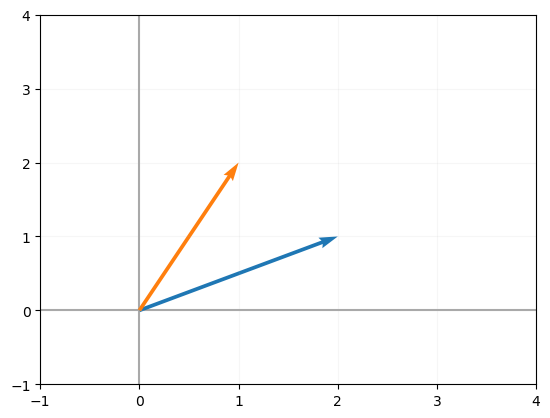

(-1.0, 4.0)

In [40]:
plotVectors([v, Av], ["C0", "C1"])

plt.ylim(-1, 4)
plt.xlim(-1, 4)

## Test 2:

In [74]:
A = [5 1 ; 3 3 ]

2×2 Array{Int64,2}:
 5  1
 3  3

In [75]:
v = [1 ; 1] # eigen vector of A 

2-element Array{Int64,1}:
 1
 1

In [76]:
λ = 6 # eigen value of v

6

In [77]:
isapprox(A*v, λ*v)

true

In [78]:
v_2 = [1 ; -3]
λ_2 = 2

2

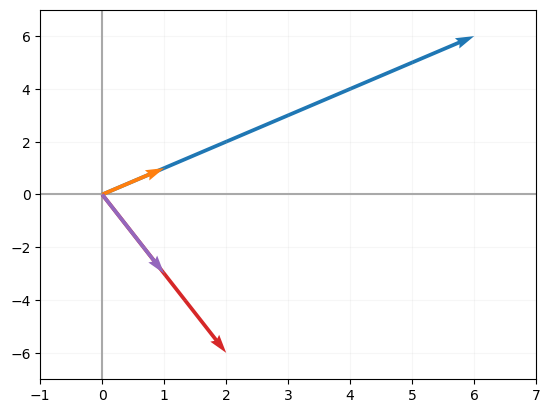

(-1.0, 7.0)

In [79]:
plotVectors([A * v, v, A*v_2, v_2], ["C0", "C1", "C3", "C4"])

plt.ylim(-7, 7)
plt.xlim(-1, 7)

## Test 3:

In [80]:
L = eigvals(A)

2-element Array{Float64,1}:
 2.0
 6.0

In [81]:
E = eigvecs(A)

2×2 Array{Float64,2}:
 -0.316228  0.707107
  0.948683  0.707107

In [82]:
v1 = E[:,1]
v2 = E[:,2]

2-element Array{Float64,1}:
 0.7071067811865475
 0.7071067811865475

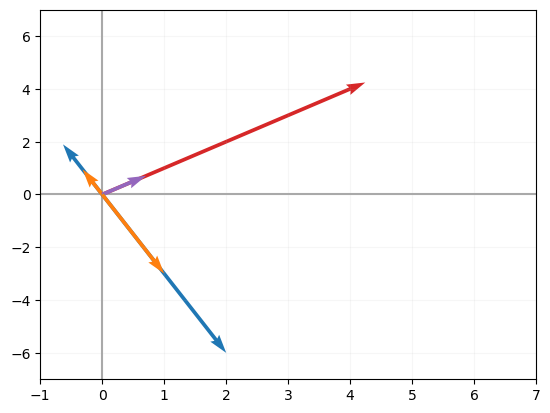

(-1.0, 7.0)

In [85]:
plotVectors([A * v1, v1, A*v2, v2, A*v_2, v_2], ["C0", "C1", "C3", "C4", "C0", "C1"])

plt.ylim(-7, 7)
plt.xlim(-1, 7)

In [86]:
# decompose matrix:

In [89]:
E  * diagm(L) * E^-1 

2×2 Array{Float64,2}:
 5.0  1.0
 3.0  3.0

In [90]:
isapprox(A, E  * diagm(L) * E^-1 )

true